In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [ ]:
data = pd.read_csv('combine1.csv')
data.head()

,hour+minute,hour,minute,second,Number of announcements,Number of withdrawals,Number of announced NLRI prefixes,Number of withdrawn NLRI prefixes,Average AS-path length,Maximum AS-path length,Average unique AS-path length,Number of duplicate announcements,Number of duplicate withdrawals,Number of implicit withdrawals,Average edit distance,Maximum edit distance,Inter-arrival time,Maximum edit distance = 7,Maximum edit distance = 8,Maximum edit distance = 9,Maximum edit distance = 10,Maximum edit distance = 11,Maximum edit distance = 12,Maximum edit distance = 13,Maximum edit distance = 14,Maximum edit distance = 15,Maximum edit distance = 16,Maximum edit distance = 17,Maximum AS-path length = 7,Maximum AS-path length = 8,Maximum AS-path length = 9,Maximum AS-path length = 10,Maximum AS-path length = 11,Maximum AS-path length = 12,Maximum AS-path length = 13,Maximum AS-path length = 14,Maximum AS-path length = 15,Number of Interior Gateway Protocol (IGP) packets,Number of Exterior Gateway Protocol (EGP) packets,Number of incomplete packets,Packet size (B),Label
0,0,0,0,0,57,8,203,16,6,15,6,206,150,20,6,100.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,8079,-1
1,1,0,1,0,62,23,361,75,6,16,6,398,355,120,6,1.1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,0,0,9515,-1
2,2,0,2,0,74,12,398,23,6,12,6,433,323,28,7,1.2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,75,0,0,8632,-1
3,3,0,3,0,70,4,543,49,6,27,6,568,210,72,8,1.1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,72,0,0,9227,-1
4,4,0,4,0,51,4,347,4,5,8,5,439,263,5,6,0.8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,0,7831,-1


In [ ]:
data.columns

Index(['hour+minute', 'hour', 'minute', 'second', 'Number of announcements',
       'Number of withdrawals', 'Number of announced NLRI prefixes',
       'Number of withdrawn NLRI prefixes', 'Average AS-path length',
       'Maximum AS-path length', 'Average unique AS-path length',
       'Number of duplicate announcements', 'Number of duplicate withdrawals',
       'Number of implicit withdrawals', 'Average edit distance',
       'Maximum edit distance', 'Inter-arrival time',
       'Maximum edit distance = 7', 'Maximum edit distance = 8',
       'Maximum edit distance = 9', 'Maximum edit distance = 10',
       'Maximum edit distance = 11', 'Maximum edit distance = 12',
       'Maximum edit distance = 13', 'Maximum edit distance = 14',
       'Maximum edit distance = 15', 'Maximum edit distance = 16',
       'Maximum edit distance = 17', 'Maximum AS-path length = 7',
       'Maximum AS-path length = 8', 'Maximum AS-path length = 9',
       'Maximum AS-path length = 10', 'Maximum AS-pat

In [ ]:
print(data.groupby('Label').size())

Label
-1    10104
 1      600
dtype: int64


In [ ]:
data['Label'] = data['Label'].apply(lambda x: 0 if x == -1 else 1)

In [ ]:
data['Label']

0        0
1        0
2        0
3        0
4        0
        ..
10699    0
10700    0
10701    0
10702    0
10703    0
Name: Label, Length: 10704, dtype: int64

In [ ]:
data.shape

(10704, 42)

In [ ]:
data.dtypes

hour+minute                                            int64
hour                                                   int64
minute                                                 int64
second                                                 int64
Number of announcements                                int64
Number of withdrawals                                  int64
Number of announced NLRI prefixes                      int64
Number of withdrawn NLRI prefixes                      int64
Average AS-path length                                 int64
Maximum AS-path length                                 int64
Average unique AS-path length                          int64
Number of duplicate announcements                      int64
Number of duplicate withdrawals                        int64
Number of implicit withdrawals                         int64
Average edit distance                                  int64
Maximum edit distance                                float64
Inter-arrival time      

In [ ]:
data=data.drop('hour+minute',axis=1)

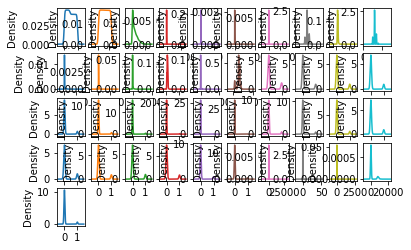

In [ ]:
data.plot(kind='density', subplots=True, layout=(5,10), sharex=False, legend=False, fontsize=10)
plt.show()

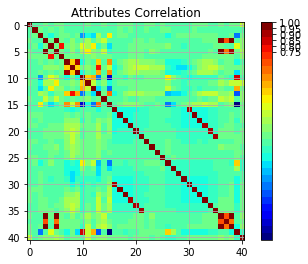

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Attributes Correlation')
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
Y = data['Label'].values
X = data.drop('Label', axis=1).values

In [ ]:
Y = np.reshape(Y,(10704,1))
Y.shape

(10704, 1)

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [ ]:
rescaledX = np.reshape(rescaledX,(10704,40,1))

In [ ]:
rescaledX.shape

(10704, 40, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(rescaledX,Y,test_size=0.20,random_state=21)

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Fitting to the training set
regressorGRU.fit(x_train,y_train,epochs=10,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/10
137/137 [==============================] - 39s 245ms/step - loss: 0.8733 - accuracy: 0.9415 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 2/10
137/137 [==============================] - 33s 239ms/step - loss: 0.8782 - accuracy: 0.9431 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 3/10
137/137 [==============================] - 33s 238ms/step - loss: 0.8751 - accuracy: 0.9431 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 4/10
137/137 [==============================] - 33s 239ms/step - loss: 0.8783 - accuracy: 0.9431 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 5/10
137/137 [==============================] - 33s 240ms/step - loss: 0.8783 - accuracy: 0.9431 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 6/10
137/137 [==============================] - 33s 242ms/step - loss: 0.8782 - accuracy: 0.9431 - val_loss: 0.8374 - val_accuracy: 0.9457
Epoch 7/10
137/137 [==============================] - 33s 239ms/step - loss: 0.8782 - accuracy: 0.9431 - val_loss: 0.8374 - val_ac

In [ ]:
 y_pred=regressorGRU.predict(x_test)
 y_pred = np.reshape(y_pred,(2141))
 y_pred=list(y_pred)

In [ ]:
for i,val in zip(range(2141),y_pred):
  if val>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
train_acc = regressorGRU.evaluate(x_train, y_train, verbose=0)
test_acc = regressorGRU.evaluate(x_test, y_test, verbose=0)

In [ ]:
print(train_acc)
print(test_acc)

[0.8700518608093262, 0.9435945153236389]
[0.8429328203201294, 0.9453526139259338]


In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[2024,    0],
       [ 117,    0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2024
           1       0.00      0.00      0.00       117

    accuracy                           0.95      2141
   macro avg       0.47      0.50      0.49      2141
weighted avg       0.89      0.95      0.92      2141



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
